In [35]:
from RWS import Besov_Bernoulli_prior
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns

sns.set_palette("Paired_r")
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
})
params= {'text.latex.preamble' : r'\usepackage{amsmath}'}
plt.rcParams.update(params)
plt.rcParams['xtick.labelsize']= 15
plt.rcParams['ytick.labelsize']= 15


Initializingthe prior by choosing $\alpha,\beta,\theta,\gamma$, the wavelet basis $\psi$, the truncation parameter of the scales $J$, the random variables $\xi$, and the grid $x$ of interest.

In [36]:
alpha = -1
beta = -1
theta = 0
gamma = -1
wavelet = 'db10'
J = 10
dist = stats.norm
prior =Besov_Bernoulli_prior(alpha,beta,theta,gamma,dist,wavelet,J)
x = np.linspace(-25,25, 1000)

Plotting a sample from the Besov Bernoulli prior with various choices of $\alpha,\beta,\gamma$ and $\mu, \nu$.

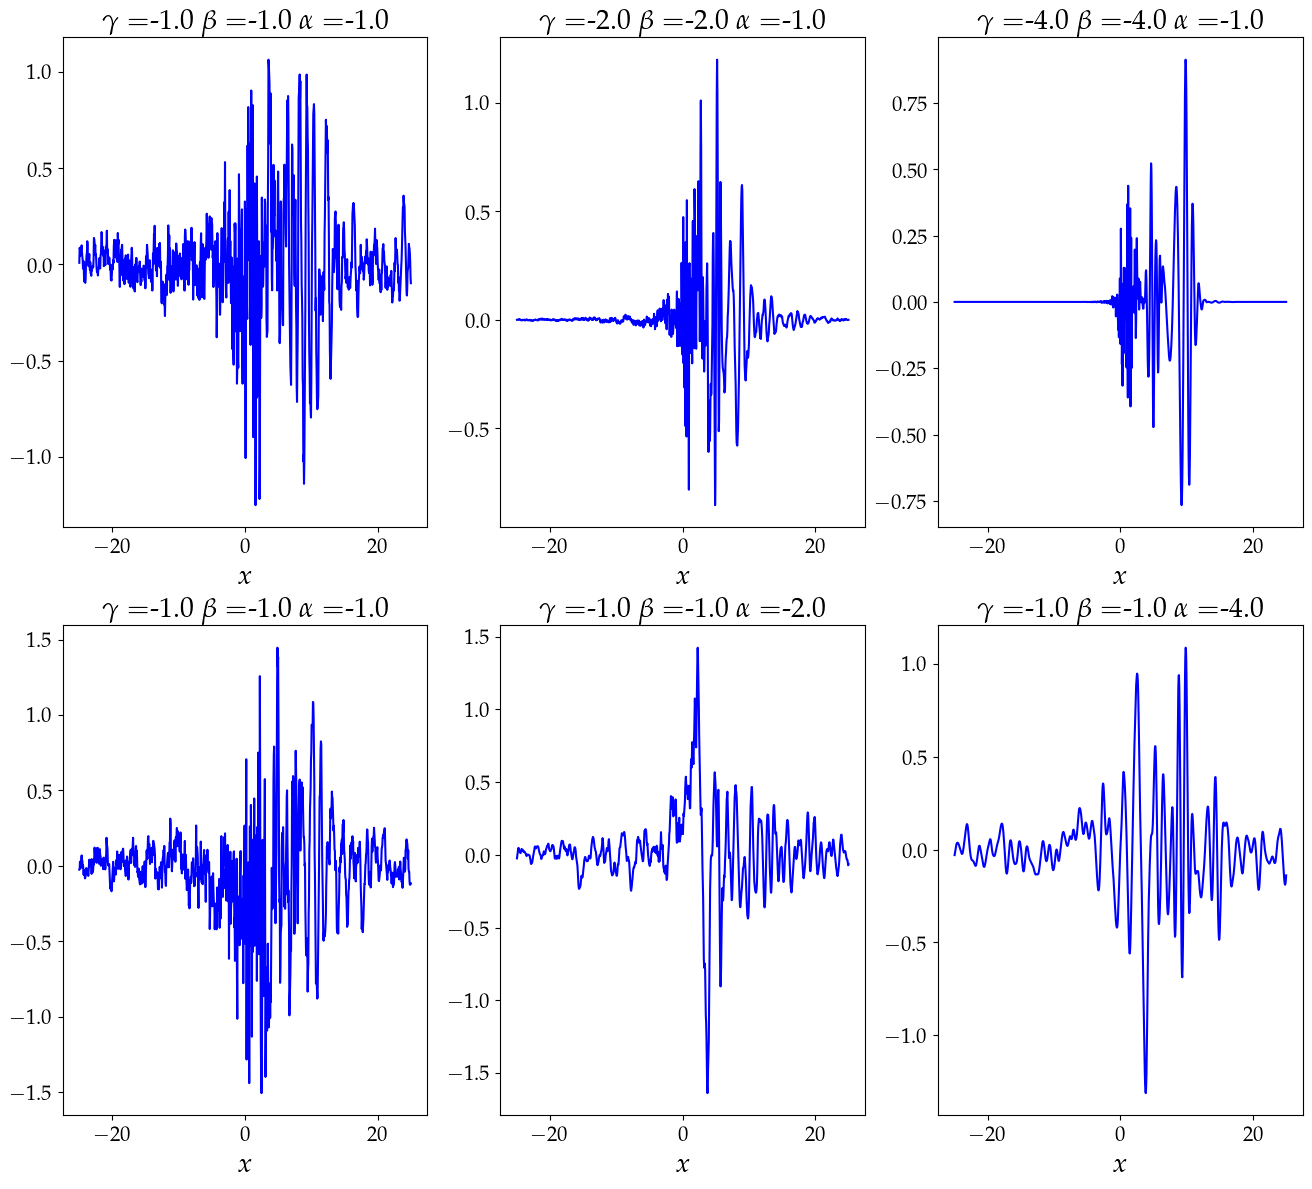

In [37]:
np.random.seed(5)
prior.mu =0.0
prior.nu = 0.0
n_samples = 1
gamma = [-1.0,-2.0,-4.0]
alpha = gamma
prior.alpha = -1.0
fig, ax = plt.subplots(2,3, figsize=(16,14))
for i in range(len(gamma)):
    prior.gamma = gamma[i]
    prior.beta = gamma[i]
    for n in range(n_samples):
        ax[0,i].plot(x,prior.sample(x),'b-')
    ax[0,i].set_title(r"$\gamma=$" + str(prior.gamma) + r" $\beta=$" + str(prior.beta) + r" $\alpha=$" + str(prior.alpha),fontsize=20)
    ax[0,i].set_xlabel(r'$x$',fontsize=20)
prior.gamma = -1.0
prior.beta = -1.0
for i in range(len(alpha)):
    prior.alpha = alpha[i]
    for n in range(n_samples):
        ax[1,i].plot(x,prior.sample(x),'b-')
    ax[1,i].set_title(r"$\gamma=$" + str(prior.gamma) + r" $\beta=$" + str(prior.beta) + r" $\alpha=$" + str(prior.alpha),fontsize=20)
    ax[1,i].set_xlabel(r'$x$',fontsize=20)
fig.savefig("Besov_Bernoulli_plot_1.pdf", format="pdf")       
   

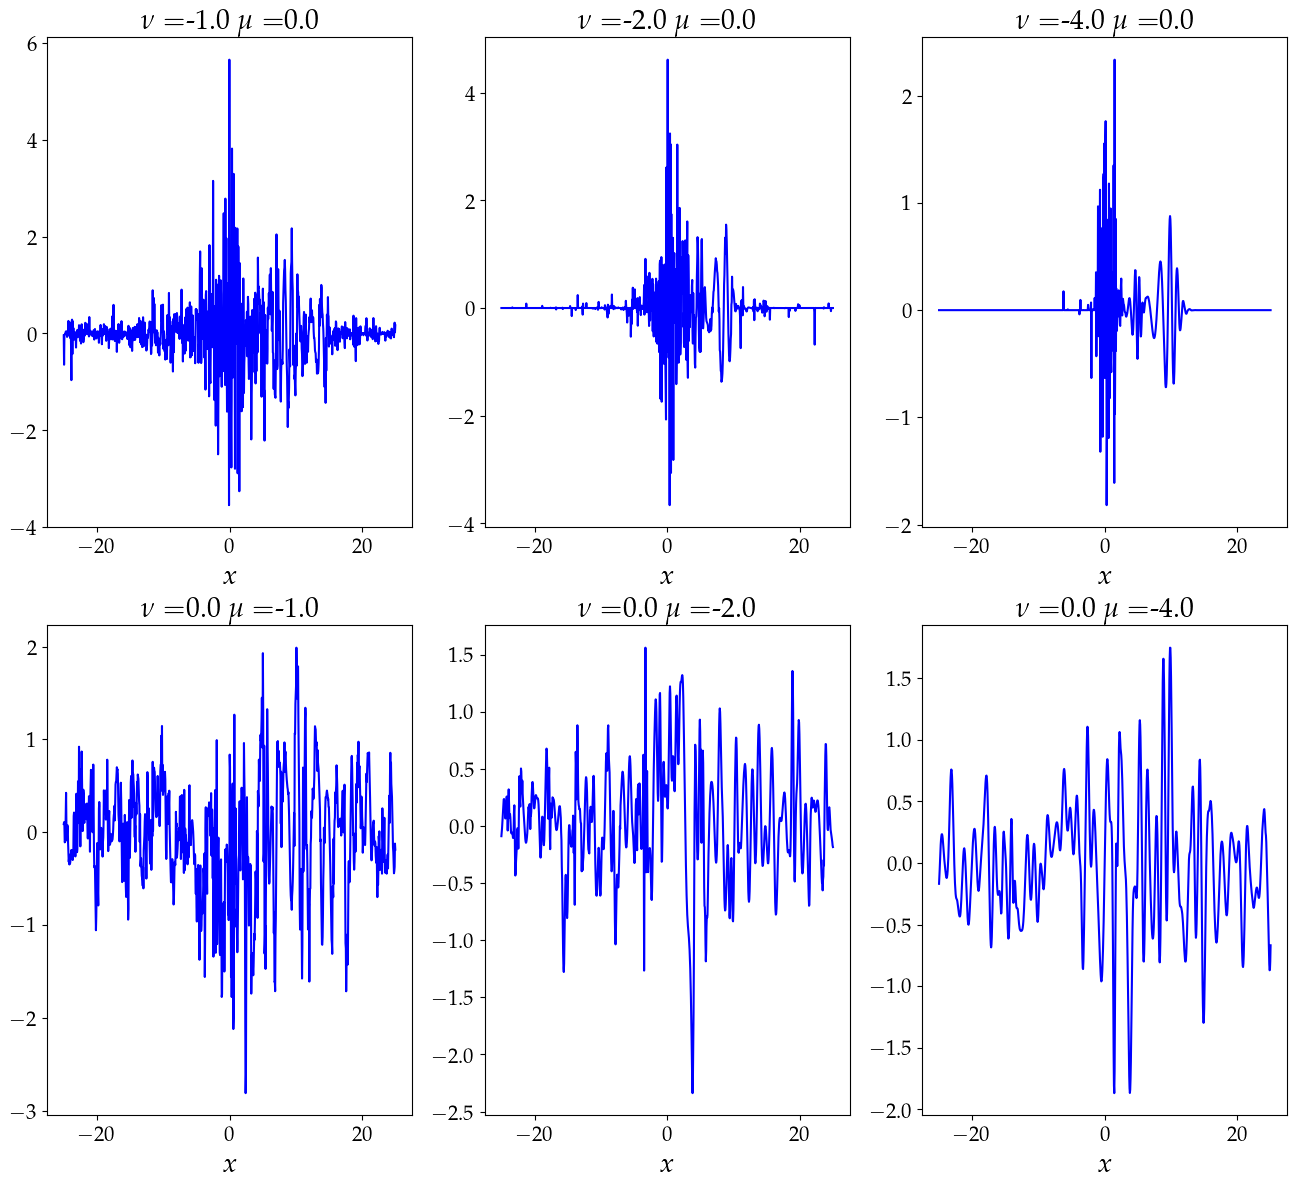

In [38]:
np.random.seed(5)
n_samples = 1
nu = [-1.0,-2.0,-4.0]
mu = nu
prior.alpha = -0.5
prior.gamma = -0.5
prior.beta = -0.5
prior.mu=0.0
fig, ax = plt.subplots(2,3, figsize=(16,14))
for i in range(len(nu)):
    prior.nu = nu[i]
    for n in range(n_samples):
        ax[0,i].plot(x,prior.sample(x),'b-')
    ax[0,i].set_title(r"$\nu=$" + str(prior.nu) + r" $\mu=$" + str(prior.mu), fontsize=20)
    ax[0,i].set_xlabel(r'$x$', fontsize=20)
prior.nu = 0.0
for i in range(len(mu)):
    prior.mu = mu[i]
    for n in range(n_samples):
        ax[1,i].plot(x,prior.sample(x),'b-')
    ax[1,i].set_title(r"$\nu=$" + str(prior.nu) + r" $\mu=$" + str(prior.mu),fontsize=20)
    ax[1,i].set_xlabel(r'$x$', fontsize=20)    
fig.savefig("Besov_Bernoulli_plot_2.pdf", format="pdf")     